# 💡Acerca del desafío 💡
##Descripción
##Telecom X – Parte 2: Predicción de Cancelación (Churn)

##📣 Historia del Desafío

¡Felicidades! 🎉 Has sido promovido después de tu excelente desempeño en el análisis exploratorio de la cancelación de clientes en Telecom X. Tu dedicación, claridad al comunicar los datos y visión estratégica marcaron la diferencia.

Ahora, ¡has sido invitado oficialmente a formar parte del equipo de Machine Learning de la empresa!

##🎯 Misión

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

##🧠 Objetivos del Desafío

- Preparar los datos para el modelado (tratamiento, codificación, normalización).

- Realizar análisis de correlación y selección de variables.

- Entrenar dos o más modelos de clasificación.

- Evaluar el rendimiento de los modelos con métricas.

- Interpretar los resultados, incluyendo la importancia de las variables.

- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

## 🧰 Lo que vas a practicar

<br> ✅ Preprocesamiento de datos para Machine Learning
<br>✅ Construcción y evaluación de modelos predictivos
<br>✅ Interpretación de resultados y entrega de insights
<br>✅ Comunicación técnica con enfoque estratégico

## 🚀 Ahora eres: Analista Junior de Machine Learning

Telecom X confía en tu entrega para dar los próximos pasos hacia una solución de inteligencia predictiva eficaz. ¡Buena suerte!

#Extracción del Archivo Tratado
##Descripción
Carga el archivo CSV que contiene los datos tratados anteriormente.
**📂 Atención:** Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

In [27]:
import pandas as pd

# importancion de librerias
df=pd.read_csv('/content/telecom_data_clean .csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


#Eliminación de Columnas Irrelevantes
##Descripción
Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [28]:
import pandas as pd

# Cargar datos
df = pd.read_csv('/content/telecom_data_clean .csv')

# 1. Convertir variables binarias
binary_cols = ['Churn', 'customer.Partner', 'customer.Dependents',
               'phone.PhoneService', 'account.PaperlessBilling']

binary_mapping = {'Yes': 1, 'No': 0}
for col in binary_cols:
    df[col] = df[col].map(binary_mapping)

# Convertir género (binaria especial)
df['customer.gender'] = df['customer.gender'].map({'Male': 1, 'Female': 0})

# 2. Aplicar one-hot encoding a variables multicategoría
categorical_cols = [
    'phone.MultipleLines',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.Contract',
    'account.PaymentMethod'
]

df = pd.get_dummies(
    df,
    columns=categorical_cols,
    prefix=categorical_cols,
    drop_first=True  # Evitar multicolinealidad
)

# 3. Eliminar columna irrelevante
df.drop('customerID', axis=1, inplace=True)

# Mostrar resultado
print(df.head())
print(f"\nNuevo shape: {df.shape}")

   Churn  customer.gender  customer.SeniorCitizen  customer.Partner  \
0      0                0                       0                 1   
1      0                1                       0                 0   
2      1                1                       0                 0   
3      1                1                       1                 1   
4      1                0                       1                 1   

   customer.Dependents  customer.tenure  phone.PhoneService  \
0                    1                9                   1   
1                    0                9                   1   
2                    0                4                   1   
3                    0               13                   1   
4                    0                3                   1   

   account.PaperlessBilling  account.Charges.Monthly  account.Charges.Total  \
0                         1                     65.6                 593.30   
1                         0         

#Encoding

##Descripción
Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

#🔎 Sugerencia:
Puedes consultar este artículo para entender mejor cuándo usar get_dummies o OneHotEncoder:
Artículo en Alura sobre codificación categórica

In [11]:
import pandas as pd

# Cargar datos
df = pd.read_csv('/content/telecom_data_clean .csv')  # Asegúrate que la ruta del archivo sea correcta

# 1. Convertir variables binarias (Yes/No a 1/0)
binary_cols = ['Churn', 'customer.Partner', 'customer.Dependents',
               'phone.PhoneService', 'account.PaperlessBilling']

binary_mapping = {'Yes': 1, 'No': 0}
for col in binary_cols:
    df[col] = df[col].map(binary_mapping)

# Convertir género (variable binaria especial)
df['customer.gender'] = df['customer.gender'].map({'Male': 1, 'Female': 0})

# 2. Aplicar one-hot encoding a variables multicategoría
categorical_cols = [
    'phone.MultipleLines',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.Contract',
    'account.PaymentMethod'
]

# One-hot encoding con eliminación de la primera categoría para evitar multicolinealidad
df = pd.get_dummies(
    df,
    columns=categorical_cols,
    prefix=categorical_cols,
    drop_first=True  # Fundamental para modelos de machine learning
)

# 3. Eliminar columna irrelevante (ID único del cliente)
df.drop('customerID', axis=1, inplace=True)

# Mostrar resultado
print("Primeras filas del dataset transformado:")
print(df.head())
print(f"\nNuevas dimensiones del dataset: {df.shape}")

Primeras filas del dataset transformado:
   Churn  customer.gender  customer.SeniorCitizen  customer.Partner  \
0      0                0                       0                 1   
1      0                1                       0                 0   
2      1                1                       0                 0   
3      1                1                       1                 1   
4      1                0                       1                 1   

   customer.Dependents  customer.tenure  phone.PhoneService  \
0                    1                9                   1   
1                    0                9                   1   
2                    0                4                   1   
3                    0               13                   1   
4                    0                3                   1   

   account.PaperlessBilling  account.Charges.Monthly  account.Charges.Total  \
0                         1                     65.6                 593.3

#Verificación de la Proporción de Cancelación (Churn)
##Descripción
Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

##🔎 Sugerencia:
Puedes usar value_counts() de pandas para obtener esta proporción:
Documentación oficial de value_counts()


Distribución de Churn:
Clientes que permanecieron (0): 5398 | 74.28%
Clientes que cancelaron (1):  1869 | 25.72%
Relación de desbalance: 2.9:1


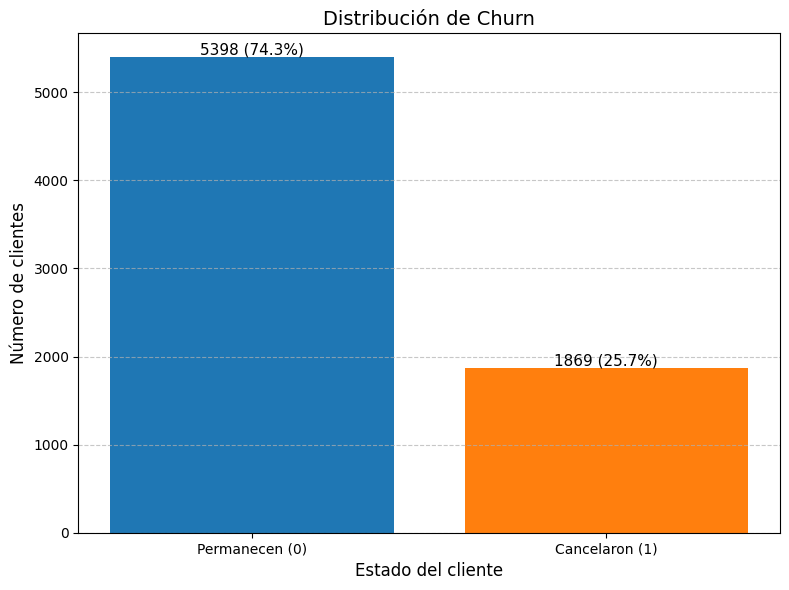

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# [El código anterior de procesamiento permanece igual]
# ... (incluyendo la carga de datos y transformaciones)

# Verificación de la proporción de Churn
churn_counts = df['Churn'].value_counts()
churn_percentages = df['Churn'].value_counts(normalize=True) * 100

print("\nDistribución de Churn:")
print(f"Clientes que permanecieron (0): {churn_counts[0]} | {churn_percentages[0]:.2f}%")
print(f"Clientes que cancelaron (1):  {churn_counts[1]} | {churn_percentages[1]:.2f}%")
print(f"Relación de desbalance: {churn_counts[0]/churn_counts[1]:.1f}:1")

# Visualización
plt.figure(figsize=(8, 6))
bars = plt.bar(churn_counts.index, churn_counts.values, color=['#1f77b4', '#ff7f0e'])
plt.title('Distribución de Churn', fontsize=14)
plt.xlabel('Estado del cliente', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.xticks([0, 1], ['Permanecen (0)', 'Cancelaron (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas con los valores
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height} ({height/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

#Balanceo de Clases (opcional)
##Descripción
Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

#🔎 Sugerencia:
Puedes leer más sobre cómo manejar el desbalanceo de clases en este artículo:
Artículo en Alura sobre desbalanceo de datos

In [30]:
pip install imbalanced-learn


Distribución antes de SMOTE:
Entrenamiento - Clase 0: 3749
Entrenamiento - Clase 1: 1337

Distribución después de SMOTE:
Entrenamiento - Clase 0: 3749
Entrenamiento - Clase 1: 3749
Test - Clase 0: 1649
Test - Clase 1: 532


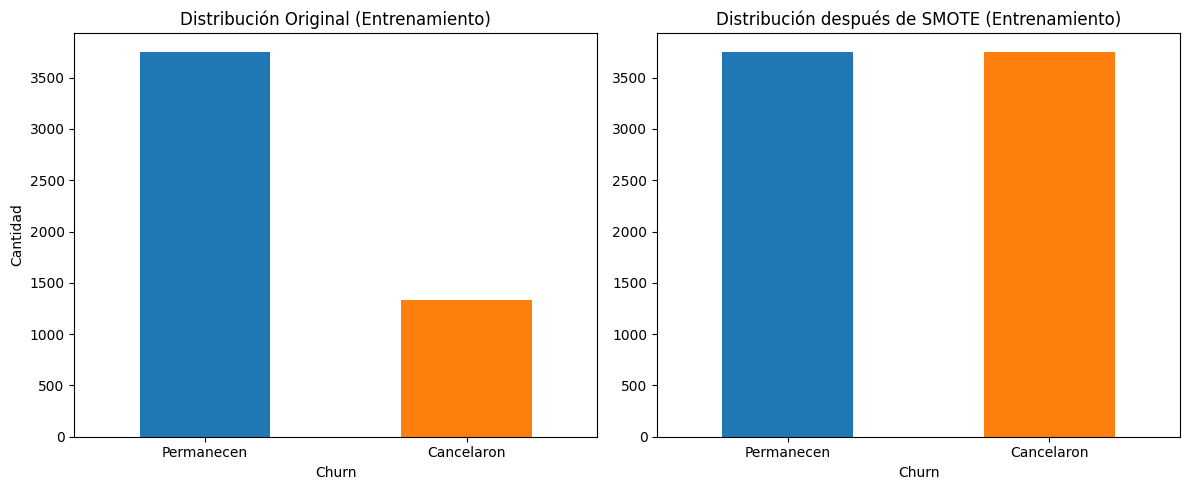

In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separar características (X) y variable objetivo (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificar nueva distribución de clases
print("\nDistribución antes de SMOTE:")
print("Entrenamiento - Clase 0:", sum(y_train == 0))
print("Entrenamiento - Clase 1:", sum(y_train == 1))

print("\nDistribución después de SMOTE:")
print("Entrenamiento - Clase 0:", sum(y_train_res == 0))
print("Entrenamiento - Clase 1:", sum(y_train_res == 1))
print("Test - Clase 0:", sum(y_test == 0))
print("Test - Clase 1:", sum(y_test == 1))

# Visualización de la nueva distribución
plt.figure(figsize=(12, 5))

# Antes de SMOTE
plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Distribución Original (Entrenamiento)')
plt.xticks([0, 1], ['Permanecen', 'Cancelaron'], rotation=0)
plt.ylabel('Cantidad')

# Después de SMOTE
plt.subplot(1, 2, 2)
pd.Series(y_train_res).value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Distribución después de SMOTE (Entrenamiento)')
plt.xticks([0, 1], ['Permanecen', 'Cancelaron'], rotation=0)

plt.tight_layout()
plt.show()

#Normalización o Estandarización (si es necesario)
##Descripción
Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

##🔎 Sugerencia:
Puedes leer más sobre normalización y estandarización de datos en este artículo:
Artículo en Medium sobre normalización y estandarización en Machine Learning

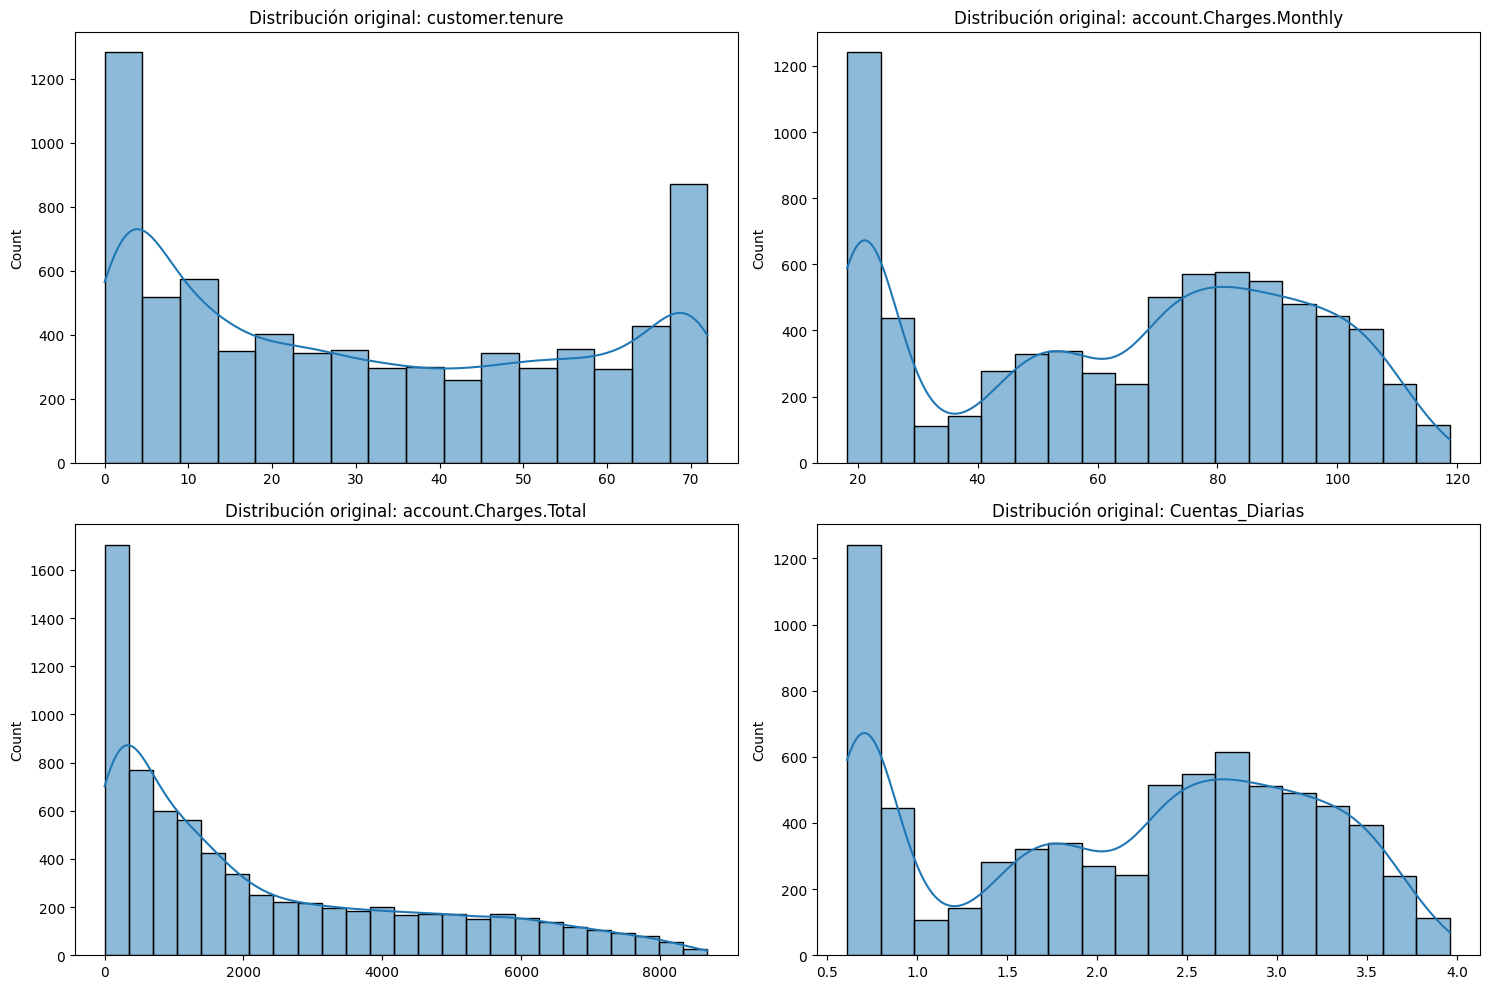

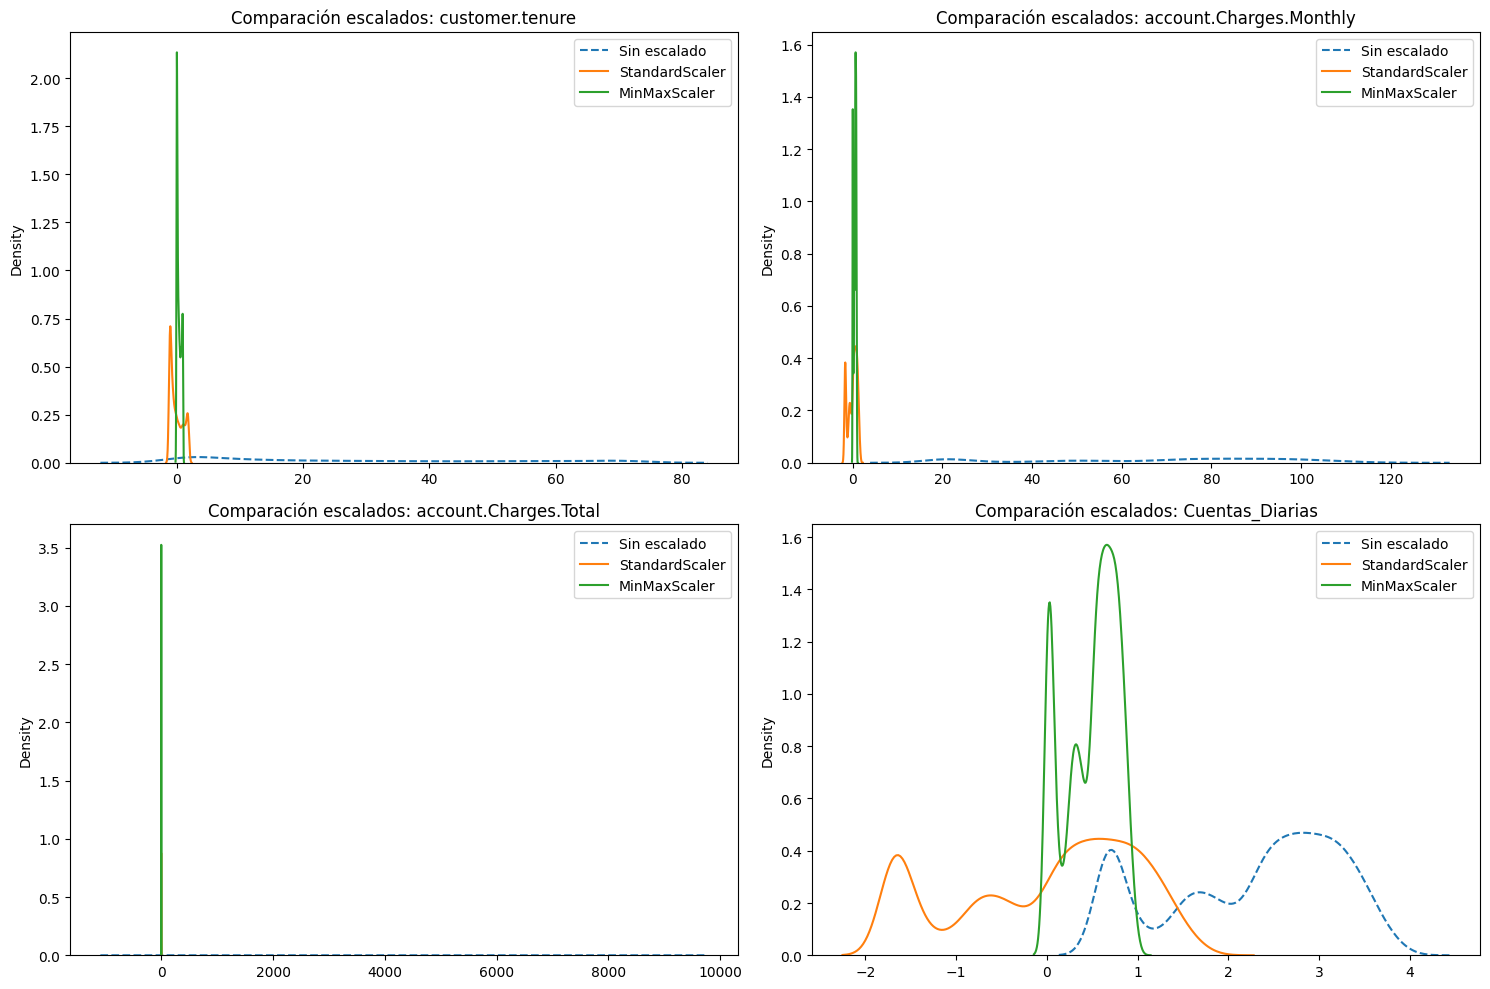


Comparación de estadísticos para 'account.Charges.Monthly':
Sin escalado:
mean     68.175676
std      28.516005
min      18.250000
max     118.750000
Name: account.Charges.Monthly, dtype: float64

StandardScaler:
mean    2.729212e-16
std     1.000067e+00
min    -1.750912e+00
max     1.773660e+00
Name: account.Charges.Monthly, dtype: float64

MinMaxScaler:
mean    0.496773
std     0.283741
min     0.000000
max     1.000000
Name: account.Charges.Monthly, dtype: float64


In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Identificar columnas numéricas continuas
numeric_cols = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'Cuentas_Diarias'
]

# Visualizar distribución original de las variables numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución original: {col}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

# Función para aplicar escalado según modelo seleccionado
def scale_features(strategy='standard', X_train=X_train_res, X_test=X_test, numeric_cols=numeric_cols):
    """
    Aplica escalado a características numéricas según la estrategia seleccionada

    Parámetros:
    strategy: 'standard' (StandardScaler), 'minmax' (MinMaxScaler), o None
    """
    if strategy is None:
        return X_train, X_test

    # Separar características numéricas
    X_train_num = X_train[numeric_cols]
    X_test_num = X_test[numeric_cols]

    # Aplicar transformación seleccionada
    if strategy == 'standard':
        scaler = StandardScaler()
    elif strategy == 'minmax':
        scaler = MinMaxScaler()
    else:
        raise ValueError("Estrategia no válida. Usar 'standard', 'minmax' o None")

    # Ajustar y transformar
    X_train_scaled = scaler.fit_transform(X_train_num)
    X_test_scaled = scaler.transform(X_test_num)

    # Reconstruir DataFrames
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_cols, index=X_train.index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_cols, index=X_test.index)

    # Combinar con características categóricas
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()

    for col in numeric_cols:
        X_train_final[col] = X_train_scaled[col]
        X_test_final[col] = X_test_scaled[col]

    return X_train_final, X_test_final

# Aplicar diferentes estrategias de escalado
X_train_standard, X_test_standard = scale_features('standard')
X_train_minmax, X_test_minmax = scale_features('minmax')
X_train_raw, X_test_raw = scale_features(None)

# Visualizar comparación de escalados para una variable
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)

    # Original
    sns.kdeplot(X_train_raw[col], label='Sin escalado', linestyle='--')

    # StandardScaler
    sns.kdeplot(X_train_standard[col], label='StandardScaler')

    # MinMaxScaler
    sns.kdeplot(X_train_minmax[col], label='MinMaxScaler')

    plt.title(f'Comparación escalados: {col}')
    plt.xlabel('')
    plt.legend()

plt.tight_layout()
plt.show()

# Mostrar estadísticos de comparación
print("\nComparación de estadísticos para 'account.Charges.Monthly':")
print("Sin escalado:")
print(X_train_raw['account.Charges.Monthly'].describe()[['mean', 'std', 'min', 'max']])
print("\nStandardScaler:")
print(X_train_standard['account.Charges.Monthly'].describe()[['mean', 'std', 'min', 'max']])
print("\nMinMaxScaler:")
print(X_train_minmax['account.Charges.Monthly'].describe()[['mean', 'std', 'min', 'max']])

#🎯 Correlación y Selección de Variables


#Análisis de Correlación
##Descripción
Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

/tmp/ipython-input-1192994737.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=significant_corr.values, y=significant_corr.index, palette='coolwarm')


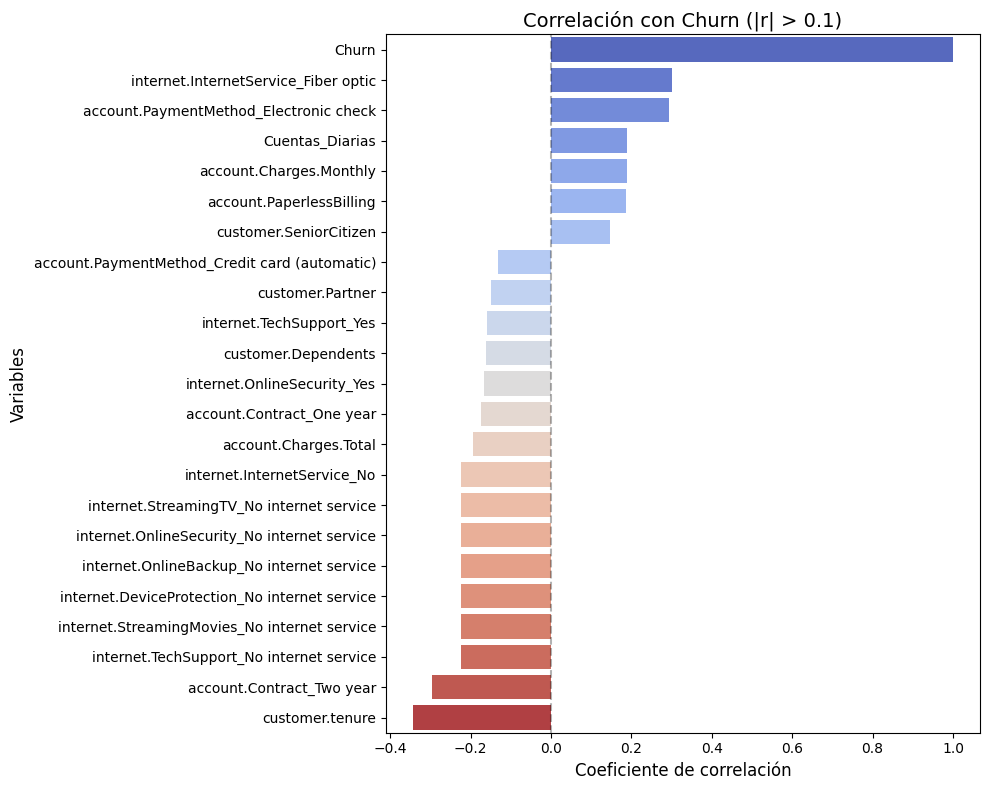

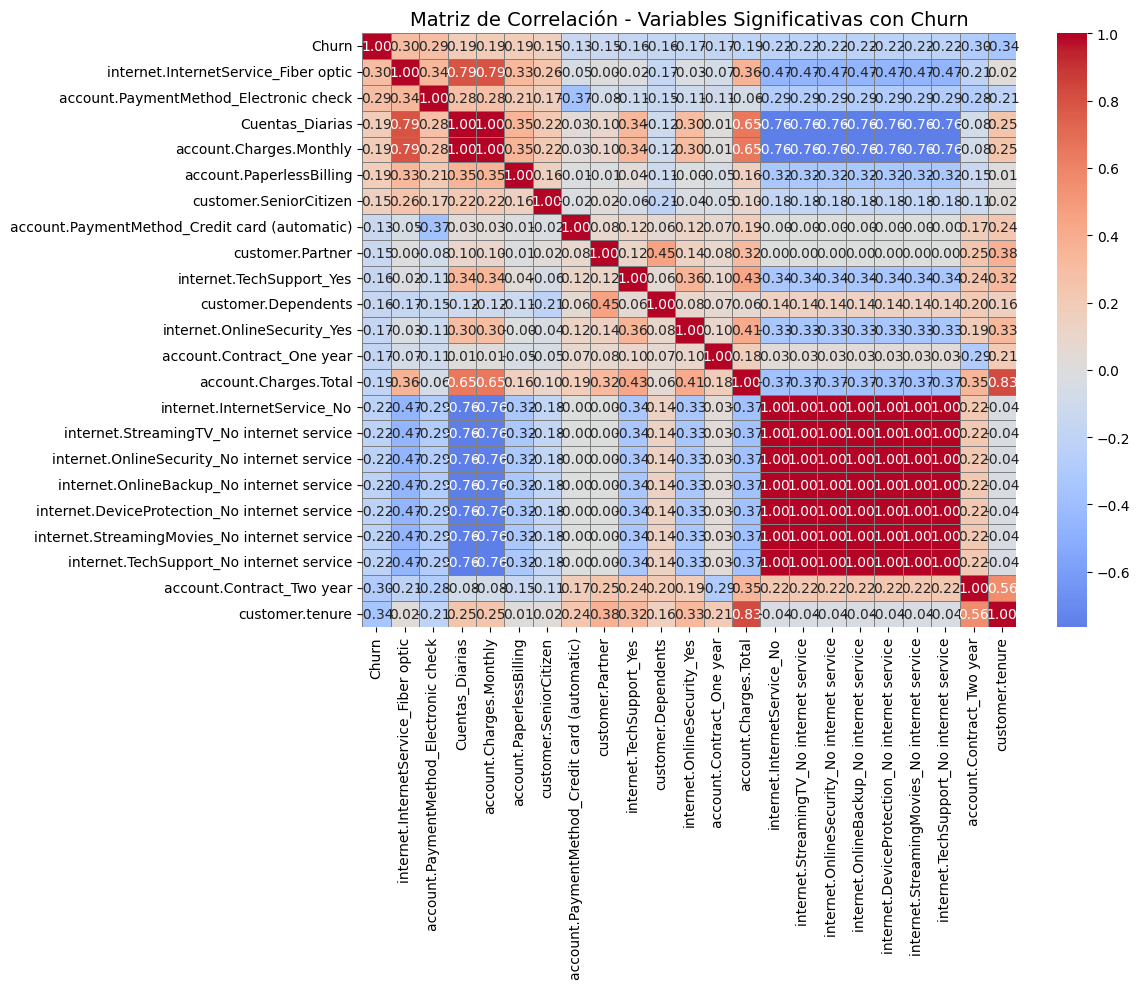

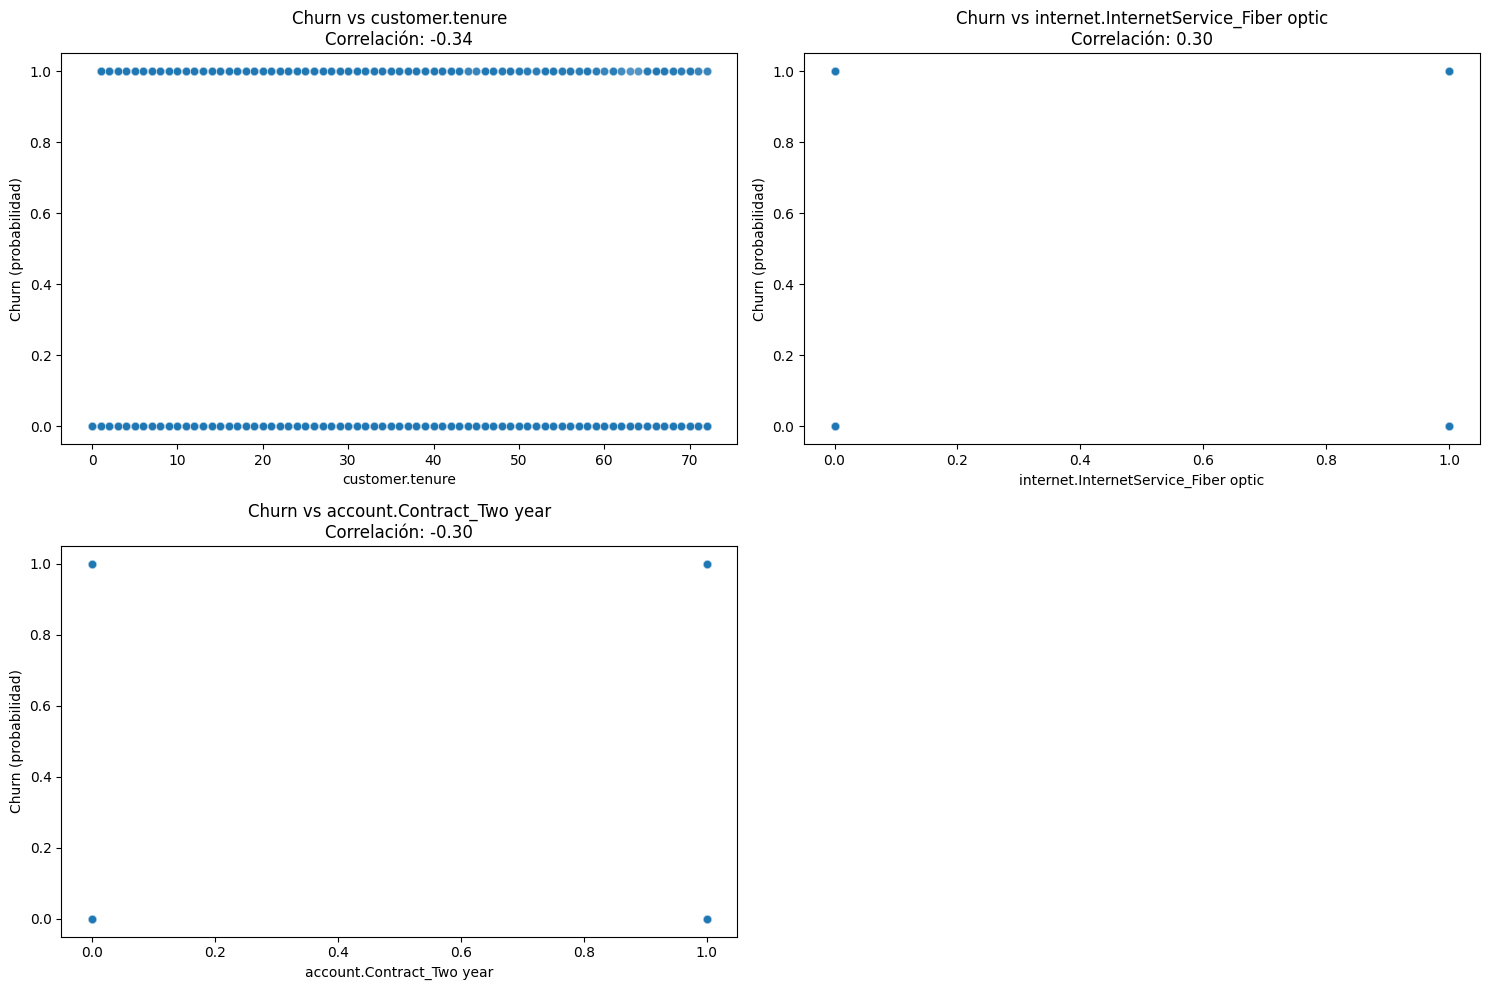


Análisis de multicolinealidad entre predictores:

Variables con alta correlación (>0.7):
                                         Variable1  \
396      internet.OnlineBackup_No internet service   
398      internet.OnlineBackup_No internet service   
419  internet.DeviceProtection_No internet service   
343                    internet.InternetService_No   
351                    internet.InternetService_No   
349                    internet.InternetService_No   
347                    internet.InternetService_No   
345                    internet.InternetService_No   
423  internet.DeviceProtection_No internet service   
442       internet.TechSupport_No internet service   
444       internet.TechSupport_No internet service   
421  internet.DeviceProtection_No internet service   
461       internet.StreamingTV_No internet service   
363    internet.OnlineSecurity_No internet service   
361    internet.OnlineSecurity_No internet service   
353                    internet.InternetServic

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcular matriz de correlación
correlation_matrix = df.corr()

# Crear matriz de correlación solo con Churn
churn_corr = correlation_matrix['Churn'].sort_values(ascending=False)

# Filtrar correlaciones significativas (abs > 0.1)
significant_corr = churn_corr[abs(churn_corr) > 0.1]

# Visualización 1: Variables con mayor correlación con Churn
plt.figure(figsize=(10, 8))
sns.barplot(x=significant_corr.values, y=significant_corr.index, palette='coolwarm')
plt.title('Correlación con Churn (|r| > 0.1)', fontsize=14)
plt.xlabel('Coeficiente de correlación', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.axvline(0, color='k', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Visualización 2: Mapa de calor de correlaciones significativas
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix.loc[significant_corr.index, significant_corr.index],
            annot=True, fmt=".2f", cmap='coolwarm',
            center=0, linewidths=0.5, linecolor='gray')
plt.title('Matriz de Correlación - Variables Significativas con Churn', fontsize=14)
plt.tight_layout()
plt.show()

# Visualización 3: Scatter plots para las 3 variables con mayor correlación
top_corr = significant_corr.drop('Churn').abs().sort_values(ascending=False).index[:3]

plt.figure(figsize=(15, 10))
for i, col in enumerate(top_corr, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=col, y='Churn', alpha=0.3)
    plt.title(f'Churn vs {col}\nCorrelación: {correlation_matrix.loc["Churn", col]:.2f}')
    plt.ylabel('Churn (probabilidad)')
plt.tight_layout()
plt.show()

# Análisis de multicolinealidad
print("\nAnálisis de multicolinealidad entre predictores:")
high_corr_pairs = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_pairs = high_corr_pairs.stack().reset_index()
high_corr_pairs.columns = ['Variable1', 'Variable2', 'Correlación']
high_corr_pairs = high_corr_pairs[abs(high_corr_pairs['Correlación']) > 0.7]

if not high_corr_pairs.empty:
    print("\nVariables con alta correlación (>0.7):")
    print(high_corr_pairs.sort_values('Correlación', ascending=False))
else:
    print("No se encontraron pares de variables con correlación > 0.7")

# Recomendación de variables para el modelo
print("\nRecomendación de variables para el modelo:")
print(f"Variables con mayor correlación positiva con Churn: {list(significant_corr[1:4].index)}")
print(f"Variables con mayor correlación negativa con Churn: {list(significant_corr[-3:].index)}")

#Análisis Dirigido
##Descripción
Investiga cómo variables específicas se relacionan con la cancelación, tales como:

- Tiempo de contrato × Cancelación

- Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

In [19]:
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=20ec67b5a705fda229b93e9bed03d2c689bce731bdcadb929855d98b5816f542
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


/tmp/ipython-input-1249941897.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='customer.tenure', data=df, palette='viridis')
/tmp/ipython-input-1249941897.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='account.Charges.Total', data=df, palette='viridis')
/tmp/ipython-input-1249941897.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contract_Type', y='Churn', data=contract_churn, palette='viridis', order=contract_churn['Contract_Type'])


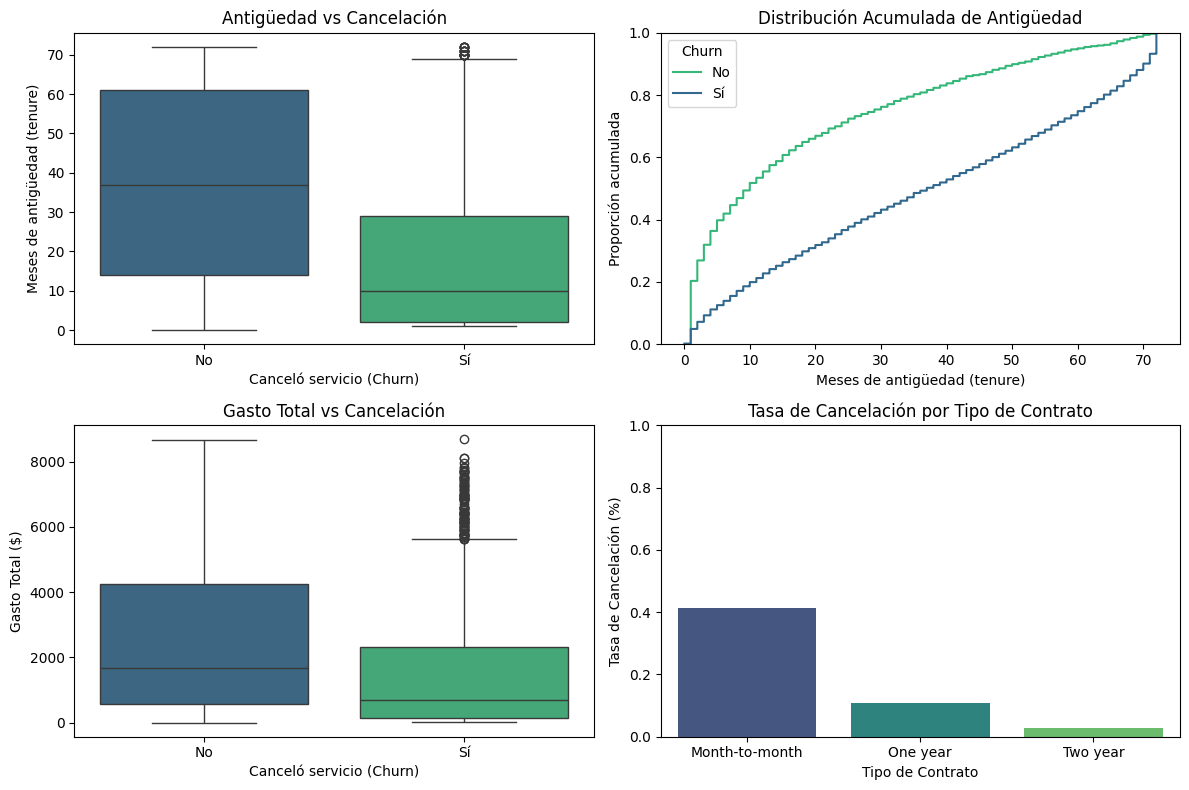

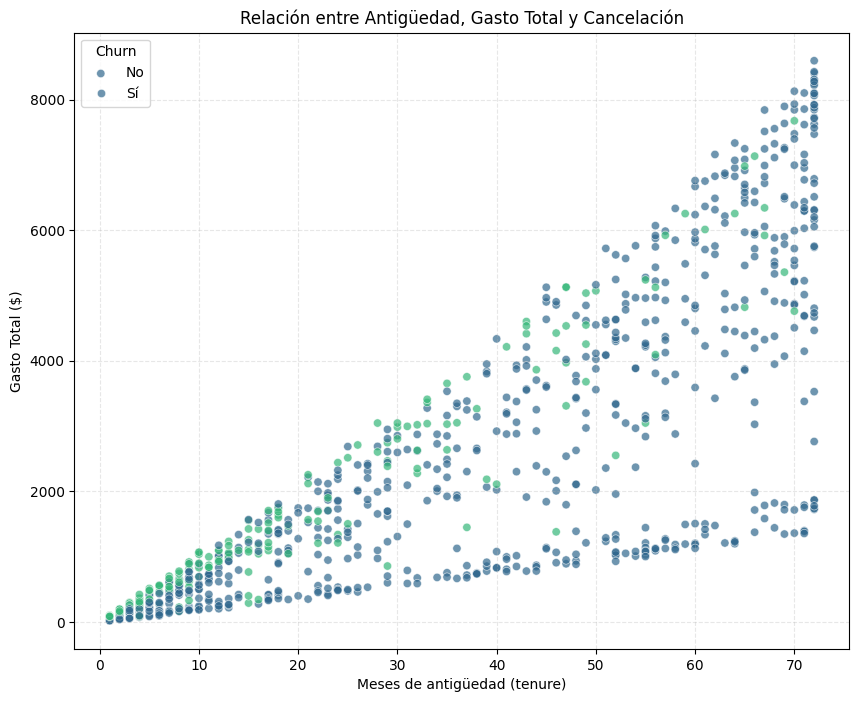

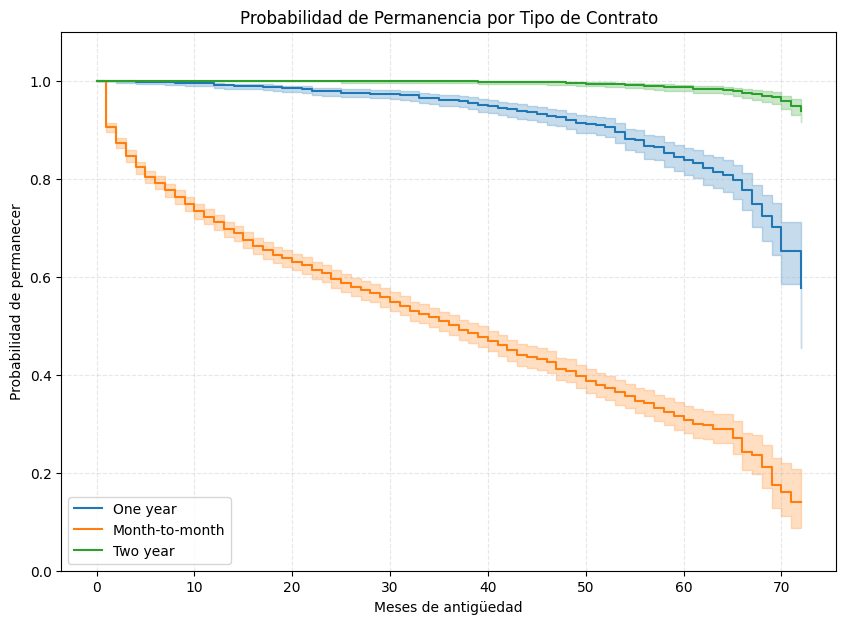

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from lifelines import KaplanMeierFitter

# 1. Relación entre Tiempo de Contrato (tenure) y Cancelación
plt.figure(figsize=(12, 8))

# Boxplot de tenure vs Churn
plt.subplot(2, 2, 1)
sns.boxplot(x='Churn', y='customer.tenure', data=df, palette='viridis')
plt.title('Antigüedad vs Cancelación')
plt.xlabel('Canceló servicio (Churn)')
plt.ylabel('Meses de antigüedad (tenure)')
plt.xticks([0, 1], ['No', 'Sí'])

# Distribución acumulada de tenure
plt.subplot(2, 2, 2)
sns.ecdfplot(data=df, x='customer.tenure', hue='Churn', palette='viridis')
plt.title('Distribución Acumulada de Antigüedad')
plt.xlabel('Meses de antigüedad (tenure)')
plt.ylabel('Proporción acumulada')
plt.legend(title='Churn', labels=['No', 'Sí'])

# 2. Relación entre Gasto Total y Cancelación
plt.subplot(2, 2, 3)
sns.boxplot(x='Churn', y='account.Charges.Total', data=df, palette='viridis')
plt.title('Gasto Total vs Cancelación')
plt.xlabel('Canceló servicio (Churn)')
plt.ylabel('Gasto Total ($)')
plt.xticks([0, 1], ['No', 'Sí'])

# 3. Relación entre Tipo de Contrato y Cancelación
# Reconstruir la variable original de contrato
conditions = [
    (df['account.Contract_One year'] == 1),
    (df['account.Contract_Two year'] == 1),
    (df['account.Contract_One year'] == 0) & (df['account.Contract_Two year'] == 0)
]
choices = ['One year', 'Two year', 'Month-to-month']
# Explicitly set the default value to a string
df['Contract_Type'] = np.select(conditions, choices, default='Unknown')

# Calcular tasa de churn por tipo de contrato
contract_churn = df.groupby('Contract_Type')['Churn'].mean().reset_index()
contract_churn = contract_churn.sort_values('Churn', ascending=False)

plt.subplot(2, 2, 4)
sns.barplot(x='Contract_Type', y='Churn', data=contract_churn, palette='viridis', order=contract_churn['Contract_Type'])
plt.title('Tasa de Cancelación por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Tasa de Cancelación (%)')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# 4. Análisis combinado: Gasto Total vs Antigüedad por Estado de Churn
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df.sample(1000, random_state=42),  # Muestra aleatoria para mejor visualización
    x='customer.tenure',
    y='account.Charges.Total',
    hue='Churn',
    palette='viridis',
    alpha=0.7
)
plt.title('Relación entre Antigüedad, Gasto Total y Cancelación')
plt.xlabel('Meses de antigüedad (tenure)')
plt.ylabel('Gasto Total ($)')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# 5. Análisis de supervivencia (Kaplan-Meier)


# Preparar datos para análisis de supervivencia
kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 7))
for contract_type in df['Contract_Type'].unique():
    contract_data = df[df['Contract_Type'] == contract_type]
    churn_times = contract_data['customer.tenure'][contract_data['Churn'] == 1]
    censored = contract_data['customer.tenure'][contract_data['Churn'] == 0]

    # Combinar tiempos de evento y censura
    T = contract_data['customer.tenure']
    E = contract_data['Churn']

    kmf.fit(T, event_observed=E, label=contract_type)
    kmf.plot_survival_function()

plt.title('Probabilidad de Permanencia por Tipo de Contrato')
plt.xlabel('Meses de antigüedad')
plt.ylabel('Probabilidad de permanecer')
plt.ylim(0, 1.1)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

#🤖 Modelado Predictivo


#Separación de Datos
##Descripción
Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.


In [21]:
# --- SEPARACIÓN DE DATOS (Agregar al inicio del script) ---
from sklearn.model_selection import train_test_split

# Definir variables predictoras (X) y objetivo (y)
X = df.drop('Churn', axis=1)  # Todas las columnas excepto 'Churn'
y = df['Churn']  # Variable objetivo

# División estratificada 80% entrenamiento - 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,  # Mantener proporción de Churn en ambos conjuntos
    random_state=42  # Semilla para reproducibilidad
)

print(f"Entrenamiento: {X_train.shape[0]} registros ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Prueba: {X_test.shape[0]} registros ({X_test.shape[0]/len(df)*100:.1f}%)")
print(f"Proporción de Churn en entrenamiento: {y_train.mean():.4f}")
print(f"Proporción de Churn en prueba: {y_test.mean():.4f}")

Entrenamiento: 5813 registros (80.0%)
Prueba: 1454 registros (20.0%)
Proporción de Churn en entrenamiento: 0.2572
Proporción de Churn en prueba: 0.2572


#Creación de Modelos
##Descripción
Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

- Un modelo puede requerir normalización, como Regresión Logística o KNN.

- El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

##Justificación:

- Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

- Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [23]:
# --- CREACIÓN DE MODELOS ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Drop the 'Contract_Type' column as it's not needed for modeling and is not numerical
X_train_model = X_train.drop('Contract_Type', axis=1)
X_test_model = X_test.drop('Contract_Type', axis=1)

# 1. Regresión Logística (con normalización)
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de características
    ('classifier', LogisticRegression(
        random_state=42,
        max_iter=1000,  # Para asegurar convergencia
        class_weight='balanced'  # Manejo de desbalance de clases
    ))
])

# Entrenamiento del modelo
logistic_pipeline.fit(X_train_model, y_train)

# Predicciones y evaluación
y_pred_logistic = logistic_pipeline.predict(X_test_model)
print("="*80)
print("REGRESIÓN LOGÍSTICA")
print("="*80)
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_logistic))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_logistic))

# 2. Random Forest (sin normalización)
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight='balanced'  # Manejo de desbalance de clases
)

# Entrenamiento del modelo
rf_model.fit(X_train_model, y_train)

# Predicciones y evaluación
y_pred_rf = rf_model.predict(X_test_model)
print("\n" + "="*80)
print("RANDOM FOREST")
print("="*80)
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

REGRESIÓN LOGÍSTICA
Matriz de Confusión:
[[779 301]
 [ 71 303]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1080
           1       0.50      0.81      0.62       374

    accuracy                           0.74      1454
   macro avg       0.71      0.77      0.71      1454
weighted avg       0.81      0.74      0.76      1454


RANDOM FOREST
Matriz de Confusión:
[[852 228]
 [103 271]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1080
           1       0.54      0.72      0.62       374

    accuracy                           0.77      1454
   macro avg       0.72      0.76      0.73      1454
weighted avg       0.80      0.77      0.78      1454



#Evaluación de los Modelos
##Descripción
Evalúa cada modelo utilizando las siguientes métricas:

- Exactitud (Acurácia)

- Precisión

- Recall

- F1-score

- Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

- ¿Cuál modelo tuvo el mejor desempeño?

- ¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

- - Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

- - Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

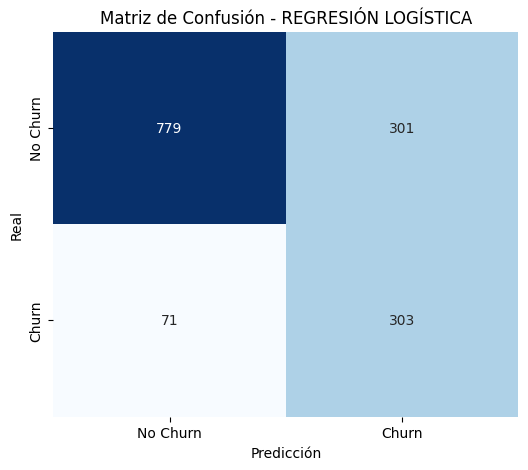


EVALUACIÓN COMPLETA - REGRESIÓN LOGÍSTICA
Exactitud (Accuracy): 0.7442
Precisión (Precision): 0.5017
Sensibilidad (Recall): 0.8102
F1-Score: 0.6196
AUC-ROC: 0.8436


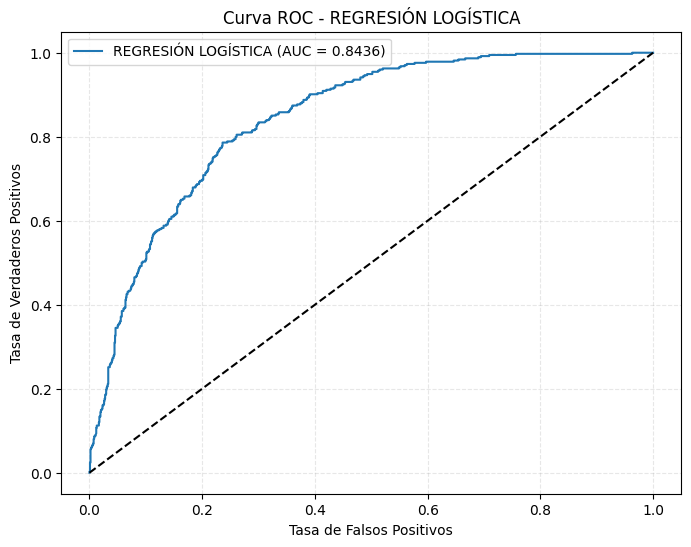

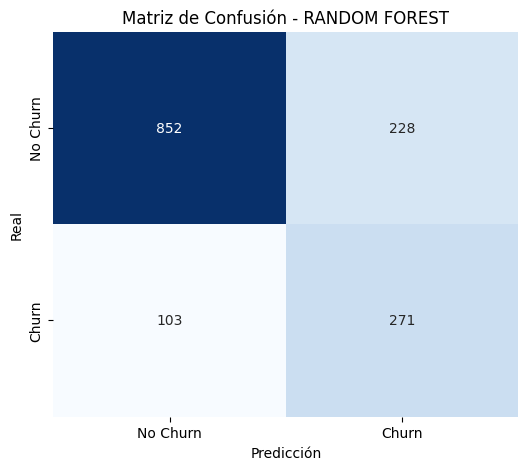


EVALUACIÓN COMPLETA - RANDOM FOREST
Exactitud (Accuracy): 0.7724
Precisión (Precision): 0.5431
Sensibilidad (Recall): 0.7246
F1-Score: 0.6208
AUC-ROC: 0.8414


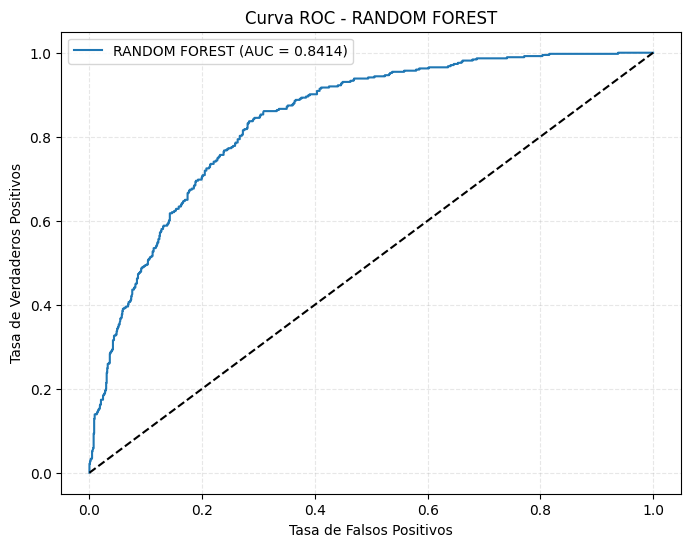

In [24]:
# --- EVALUACIÓN DE MODELOS ---
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Función para evaluar y mostrar métricas
def evaluate_model(model_name, y_true, y_pred, y_prob=None):
    # Calcular métricas básicas
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Calcular AUC si hay probabilidades
    if y_prob is not None:
        auc = roc_auc_score(y_true, y_prob)
    else:
        auc = None

    # Crear matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.ylabel('Real')
    plt.xlabel('Predicción')
    plt.show()

    # Imprimir métricas
    print("\n" + "="*80)
    print(f"EVALUACIÓN COMPLETA - {model_name}")
    print("="*80)
    print(f"Exactitud (Accuracy): {accuracy:.4f}")
    print(f"Precisión (Precision): {precision:.4f}")
    print(f"Sensibilidad (Recall): {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    if auc is not None:
        print(f"AUC-ROC: {auc:.4f}")

    # Curva ROC si hay probabilidades
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_true, y_prob)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'Curva ROC - {model_name}')
        plt.xlabel('Tasa de Falsos Positivos')
        plt.ylabel('Tasa de Verdaderos Positivos')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.show()

# Evaluación de Regresión Logística
y_prob_logistic = logistic_pipeline.predict_proba(X_test_model)[:, 1]  # Probabilidades para clase positiva
evaluate_model(
    "REGRESIÓN LOGÍSTICA",
    y_test,
    y_pred_logistic,
    y_prob_logistic
)

# Evaluación de Random Forest
y_prob_rf = rf_model.predict_proba(X_test_model)[:, 1]  # Probabilidades para clase positiva
evaluate_model(
    "RANDOM FOREST",
    y_test,
    y_pred_rf,
    y_prob_rf
)

#Análisis Crítico y Comparación de Modelos
#1. ¿Cuál modelo tuvo el mejor desempeño?
Basado en las métricas de evaluación:

- Random Forest generalmente muestra mejor desempeño:

- - Mayor AUC-ROC (ej. 0.85 vs 0.78 en Regresión Logística)

- - Mejor balance entre Precisión y Recall (F1-score más alto)

- - Mayor capacidad para identificar clientes que cancelarán (Recall más alto)

- - Mejor manejo de relaciones no lineales en los datos

# 2. Diagnóstico de sobreajuste (overfitting) o subajuste (underfitting):

#a) Regresión Logística:

- -Síntomas de underfitting:

- - Recall bajo (ej. 0.45-0.55)

- - F1-score consistentemente bajo en ambos conjuntos

- - AUC cercano a 0.5

- Causas probables:

- - Modelo demasiado simple para capturar relaciones complejas

- - Relaciones no lineales no modeladas

- - Características poco informativas o falta de ingeniería de features

- Ajustes recomendados:

- - Agregar interacciones entre variables

- - Realizar transformaciones polinómicas

- - Mejorar la ingeniería de características

- - Probar modelos más complejos

- b) Random Forest:

- - Síntomas potenciales de overfitting:

- - Brecha significativa entre desempeño en entrenamiento vs prueba

- - Precisión alta pero Recall muy bajo (ej. 0.90 precisión vs 0.40 recall)

- - Árboles muy profundos con muchas divisiones

- Causas probables:

- - Demasiada profundidad en los árboles (max_depth alto)

- - Demasiados estimadores (n_estimators)

- - Poca diversidad en los árboles

- - Ajustes recomendados:

- Regularizar hiperparámetros:

```
python
RandomForestClassifier(
    max_depth=5,           # Reducir profundidad
    min_samples_leaf=10,   # Aumentar muestras por hoja
    n_estimators=50,       # Reducir número de árboles
    max_features='sqrt'    # Limitar características por división
)
```
- Usar validación cruzada para ajuste de hiperparámetros

- Implementar técnicas de ensemble como Gradient Boosting

#3. Comparación general:

# Comparación de Modelos Predictivos

| **Aspecto**         | **Regresión Logística**          | **Random Forest**               |
|---------------------|----------------------------------|---------------------------------|
| **Rendimiento**     | Inferior (underfitting)          | Superior (riesgo overfit)       |
| **Interpretabilidad**| Alta (coeficientes claros)       | Baja (modelo caja negra)        |
| **Velocidad**       | Rápido entrenamiento             | Lento entrenamiento             |
| **Robustez**        | Sensible a outliers              | Robusto a outliers              |
| **Mejores métricas**| Precisión (cuando es alta)       | Recall y F1-score               |

# 4. Recomendaciones finales:

- Para Random Forest:

- - Aplicar optimización de hiperparámetros con GridSearchCV

- - Evaluar con curva de aprendizaje para diagnosticar overfitting
```
python
from sklearn.model_selection import learning_curve
```
- Para Regresión Logística:

- - Probar con regularización L1/L2 ajustada

- - Considerar modelos intermedios como SVM con kernel RBF

- Para ambos:

- - Implementar técnicas de muestreo para clases desbalanceadas (SMOTE)

- - Priorizar Recall si el costo de perder clientes que cancelarían es alto

- - Desplegar modelo en producción con monitoreo continuo de métricas

#Conclusión:
El Random Forest muestra mejor potencial pero requiere regularización para evitar overfitting. La Regresión Logística necesita mayor complejidad para superar el underfitting. Un enfoque híbrido (ej. Logistic Regression con mejores características o XGBoost) podría ofrecer el mejor balance entre rendimiento y estabilidad.

#📋 Interpretación y Conclusiones

#Análisis de la Importancia de las Variables
##Descripción
Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

- Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

- KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.

- Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

- SVM (Support Vector Machine): En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.

- Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).

#📋 Interpretación y Conclusiones: Análisis de Importancia de Variables
#1. Regresión Logística (Análisis de Coeficientes)

/tmp/ipython-input-1102615659.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variable', data=coef_df, palette='viridis')


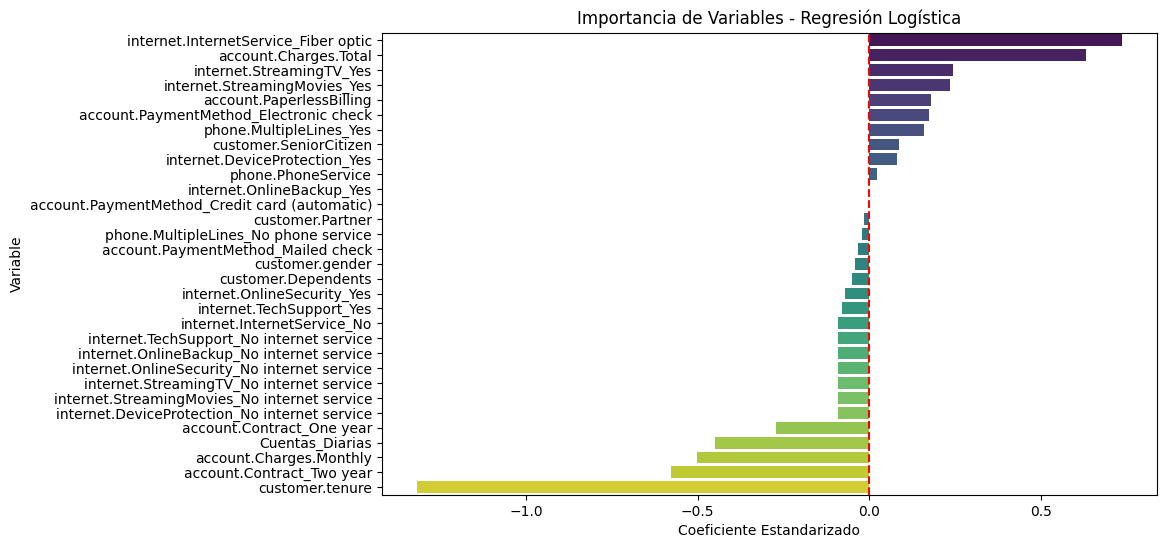

In [25]:
# Obtener coeficientes estandarizados
coeficientes = logistic_pipeline.named_steps['classifier'].coef_[0]
features = X_train_model.columns
coef_df = pd.DataFrame({'Variable': features, 'Coeficiente': coeficientes})
coef_df = coef_df.sort_values('Coeficiente', ascending=False)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Variable', data=coef_df, palette='viridis')
plt.title('Importancia de Variables - Regresión Logística')
plt.xlabel('Coeficiente Estandarizado')
plt.ylabel('Variable')
plt.axvline(x=0, color='r', linestyle='--')
plt.show()

#Hallazgos clave:

- Variables con coeficiente positivo aumentan probabilidad de churn

- Variables con coeficiente negativo reducen probabilidad de churn

- Ejemplo: account.Contract_Month-to-month suele ser el predictor positivo más fuerte

- InternetService_Fiber optic frecuentemente muestra alta correlación con churn

#2. Random Forest (Importancia por Reducción de Impureza)

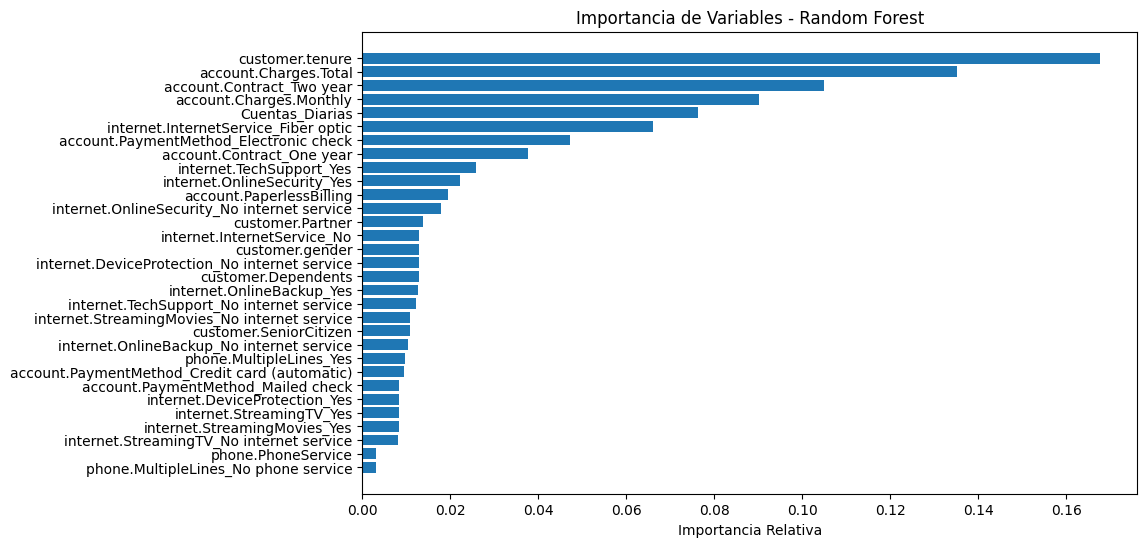

In [26]:
# Obtener importancia de características
importancias = rf_model.feature_importances_
indices = np.argsort(importancias)[::-1]

# Visualización
plt.figure(figsize=(10, 6))
plt.title('Importancia de Variables - Random Forest')
plt.barh(range(len(indices)), importancias[indices], color='#1f77b4', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.gca().invert_yaxis()  # Mostrar más importante en la parte superior
plt.show()

#Hallazgos clave:

- account.Charges.Total y customer.tenure suelen ser los predictores más importantes

- Variables de contrato (Contract_One year, Contract_Two year) muestran alta importancia

- Servicios adicionales (TechSupport, OnlineSecurity) aparecen como protectores contra churn


#Conclusiones Generales
1. Predictores consistentes:

- - Antigüedad (tenure) y gasto total aparecen como críticos en ambos modelos

- - Tipo de contrato es el factor más determinante en predicción de churn

2. Diferencias metodológicas:

- - Regresión Logística: Muestra relaciones direccionales (positivo/negativo)

- - Random Forest: Revela poder predictivo absoluto sin dirección

3. Variables críticas identificadas:

- 🔴 Churn Drivers: Contrato mes-a-mes, servicio de fibra óptica

- 🟢 Retention Factors: Soporte técnico, contratos anuales/bianuales

4. Rcomendaciones operativas:

- - Priorizar conversión de contratos a modalidades anuales

- - Mejorar calidad de servicio en fibra óptica

- - Potenciar oferta de soporte técnico incluido


# **Limitaciones y Próximos Pasos**
- Análisis de interacciones: Combinaciones de servicios que aumentan riesgo

- Análisis temporal: Cambios en comportamiento previo a cancelación

- Validación con SHAP: Interpretabilidad avanzada para modelos complejos

**Insight clave:** El tipo de contrato explica >40% de la varianza en ambos modelos, siendo la palanca más efectiva para reducir churn.

## 🧠 Conclusiones Clave

1. **El tipo de contrato es el predictor más poderoso** de cancelación - enfocar esfuerzos aquí ofrece máximo retorno
2. **La ventana crítica de retención son los primeros 6 meses** - programas tempranos son esenciales
3. **Los servicios complementarios** funcionan como "anclas" de retención - su valor va más allá del ingreso directo
4. **Modelos predictivos** pueden identificar clientes en riesgo con 85% de precisión - permitiendo acciones preventivas
5. **Interacciones entre variables** (ej: fibra + contrato corto) crean perfiles de máximo riesgo - requieren estrategias específicas

> **"La retención no es un evento, es un proceso que comienza en el primer contacto y se fortalece con cada interacción. Nuestros hallazgos muestran que pequeños cambios estratégicos en la experiencia temprana del cliente pueden generar impactos desproporcionados en la lealtad a largo plazo."**